In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
c = ["age", "workclass", "fnlwgt", "education", "education_num", 
                        "marital_status", "occupation",
                        "relationship", "race", "sex", 
                        "capital_gain", "capital_loss", 
                        "hours_per_week", "country", "salary"]

In [3]:
df_data = pd.read_csv('adult.data', names=c)
data = df_data
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
data['salary'] = data['salary'].map({' <=50K':1,' >50K':0}).astype(int)
data['sex'] = data['sex'].map({' Male': 1, ' Female': 0}).astype(int)

In [5]:
data.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,United-States,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,Jamaica,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,United-States,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,United-States,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,United-States,0


In [6]:
data['country'] = data['country'].replace(' ?', np.nan)
data['workclass'] = data['workclass'].replace(' ?', np.nan)
data['occupation'] = data['occupation'].replace(' ?', np.nan)

In [7]:
data.shape


(32561, 15)

In [8]:
data.dropna(how='any', inplace=True)

In [9]:
# data.shape
# # data['country'][data['country'] == ' United-States'].count()
# X = data['country']
# plt.hist(X)
# plt.show()

In [10]:
data['country'][data['country'] != ' United-States'] = 'Non-US'
data['country'][data['country'] == ' United-States'] = 'US'

C:\Users\Debasish\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Debasish\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,US,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,US,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,US,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,US,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Non-US,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,US,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,Non-US,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,US,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,US,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,US,0


In [12]:
data['country'] = data['country'].map({'Non-US': 0, 'US': 1}).astype(int)

In [13]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,1,0


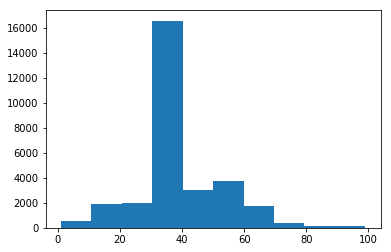

In [14]:
x = data['hours_per_week']
plt.hist(x)
plt.show()

In [15]:
data[['relationship','salary']].groupby(['relationship']).mean()
# data['relationship'].count()

,salary
relationship,
Husband,0.544331
Not-in-family,0.893477
Other-relative,0.960630
Own-child,0.985670
Unmarried,0.933686
Wife,0.506401


In [16]:
data[['marital_status','salary']].groupby(['marital_status']).mean()

,salary
marital_status,
Divorced,0.892738
Married-AF-spouse,0.523810
Married-civ-spouse,0.545041
Married-spouse-absent,0.916216
Never-married,0.951676
Separated,0.929712
Widowed,0.903265


In [17]:
data['marital_status'] = data['marital_status'].replace([' Divorced', ' Married-spouse-absent',
                                                         ' Never-married', ' Separated', ' Widowed'], 'Single')
data['marital_status'] = data['marital_status'].replace([' Married-AF-spouse', ' Married-civ-spouse'], 'Couple')
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Couple,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Couple,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Couple,Prof-specialty,Wife,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,Couple,Exec-managerial,Wife,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,Single,Other-service,Not-in-family,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Couple,Exec-managerial,Husband,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,Single,Prof-specialty,Not-in-family,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,Couple,Exec-managerial,Husband,White,1,5178,0,40,1,0


In [18]:
data[['marital_status', 'salary']].groupby(['marital_status']).mean()

,salary
marital_status,
Couple,0.545009
Single,0.931637


In [19]:
data[['marital_status', 'relationship', 'salary']].groupby(['marital_status', 'relationship']).mean()

salary
marital_status relationship             
Couple          Husband         0.544331
                Not-in-family   0.714286
                Other-relative  0.857143
                Own-child       0.821429
                Wife            0.506401
Single          Not-in-family   0.893802
                Other-relative  0.976623
                Own-child       0.988818
                Unmarried       0.933686

In [20]:
data['marital_status'] = data['marital_status'].map({'Couple': 0, 'Single':1}).astype(int)
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,Wife,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,Not-in-family,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,Husband,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,Not-in-family,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,Husband,White,1,5178,0,40,1,0


In [21]:
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [22]:
mp = {' Unmarried': 0, ' Wife': 1, ' Husband': 2, ' Not-in-family': 3, ' Own-child': 4, ' Other-relative': 5}
data['relationship'] = data['relationship'].map(mp).astype(object)
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,3,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,3,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,White,1,5178,0,40,1,0


In [23]:
data[['race', 'salary']].groupby(['race']).mean()
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [24]:
mp = {' White':0, ' Amer-Indian-Eskimo':1, ' Asian-Pac-Islander':2, ' Black':3, ' Other':4}
data['race'] = data['race'].map(mp).astype(object)
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0


In [25]:
data[['occupation', 'salary']].groupby(['occupation']).mean()

,salary
occupation,
Adm-clerical,0.866165
Armed-Forces,0.888889
Craft-repair,0.774690
Exec-managerial,0.514780
Farming-fishing,0.883721
Handlers-cleaners,0.938519
Machine-op-inspct,0.875381
Other-service,0.958904
Priv-house-serv,0.993007


In [26]:
def addColumn(x):
    a = [' Federal-gov', ' Local-gov']
    b = [' Self-emp-inc', ' Self-emp-not-inc']

    if x['workclass'] in a:
        return 'govt'
    elif x['workclass'] == ' Private':
        return 'private'
    elif x['workclass'] in b:
        return 'self_employed'
    else:
        return 'without_pay'

data['employment_type'] = data.apply(addColumn, axis=1)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,without_pay
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,self_employed
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,private
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,private
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1,private


In [27]:
data[['employment_type', 'salary']].groupby(['employment_type']).mean()

,salary
employment_type,
govt,0.676412
private,0.781208
self_employed,0.632242
without_pay,0.733952


In [28]:
mp = {'govt': 0, 'private': 1, 'self_employed': 2, 'without_pay': 3}
data['employment_type'] = data['employment_type'].map(mp).astype(int)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,3
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1,1


In [29]:
data[['education', 'salary']].groupby(['education']).mean()

,salary
education,
10th,0.928049
11th,0.943702
12th,0.923077
1st-4th,0.960265
5th-6th,0.958333
7th-8th,0.937163
9th,0.945055
Assoc-acdm,0.746032
Assoc-voc,0.736802


In [30]:
data.drop(labels=['workclass', 'education', 'occupation'], axis=1, inplace=True)
data.head()

,age,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary,employment_type
0,39,77516,13,1,3,0,1,2174,0,40,1,1,3
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1


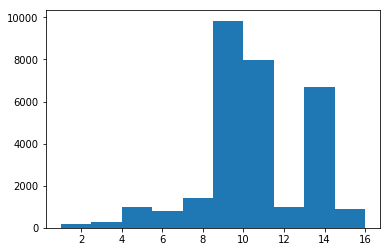

In [31]:
X = data['education_num']
plt.hist(X)
plt.show()

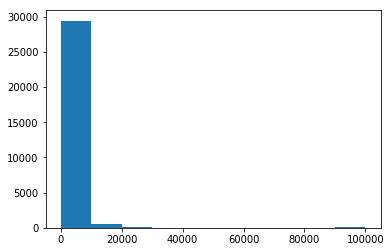

In [32]:
X = data['capital_gain']
plt.hist(X)
plt.show()

In [33]:
data.loc[(data['capital_gain'] > 0), 'capital_gain'] = 1
data.loc[(data['capital_gain'] == 0), 'capital_gain'] = 0
data.head(10)

,age,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary,employment_type
0,39,77516,13,1,3,0,1,1,0,40,1,1,3
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1
5,37,284582,14,0,1,0,0,0,0,40,1,1,1
6,49,160187,5,1,3,3,0,0,0,16,0,1,1
7,52,209642,9,0,2,0,1,0,0,45,1,0,2
8,31,45781,14,1,3,0,0,1,0,50,1,0,1
9,42,159449,13,0,2,0,1,1,0,40,1,0,1


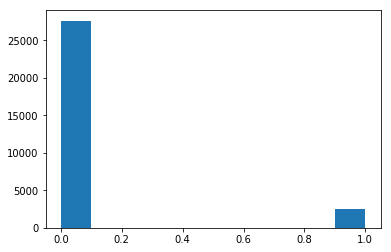

In [34]:
X = data['capital_gain']
plt.hist(X)
plt.show()

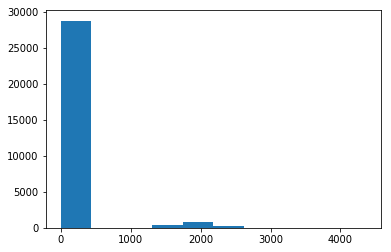

In [35]:
X = data['capital_loss']
plt.hist(X)
plt.show()

In [36]:
data.loc[(data['capital_loss'] > 0), 'capital_loss'] = 1
data.loc[(data['capital_loss'] == 0), 'capital_loss'] = 0
data.head()

,age,fnlwgt,education_num,marital_status,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary,employment_type
0,39,77516,13,1,3,0,1,1,0,40,1,1,3
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1


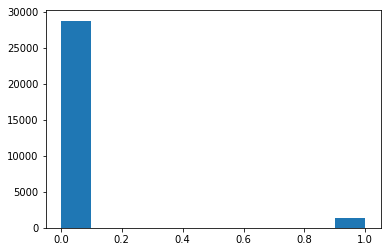

In [37]:
X = data['capital_loss']
plt.hist(X)
plt.show()

In [38]:
data['age'].count()

30162

In [39]:
from sklearn.model_selection import train_test_split

X = data.drop(['salary'], axis=1)
y = data['salary']

X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=22)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5)


In [40]:
print("Train data size: {0}{1}".format(X_train.shape, y_train.shape))
print("Validation data size: {0}{1}".format(x_val.shape, y_val.shape))
print("Test data size: {0}{1}".format(x_test.shape, y_test.shape))

Train data size: (16890, 12)(16890,)
Validation data size: (4223, 12)(4223,)
Test data size: (9049, 12)(9049,)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz

In [47]:
rfc = RandomForestClassifier(n_estimators=3)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
y_pred = rfc.predict(x_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))

Accuracy:  0.8024091059785612


In [57]:
export_graphviz(rfc.estimators_[0],max_depth = 3,out_file='tree.dot',feature_names=X_train.columns,class_names = 'salary',rounded=True,precision=2,filled=True)

In [58]:
!dot -Tpng tree.dot -o tree.png

In [59]:
from IPython.display import Image

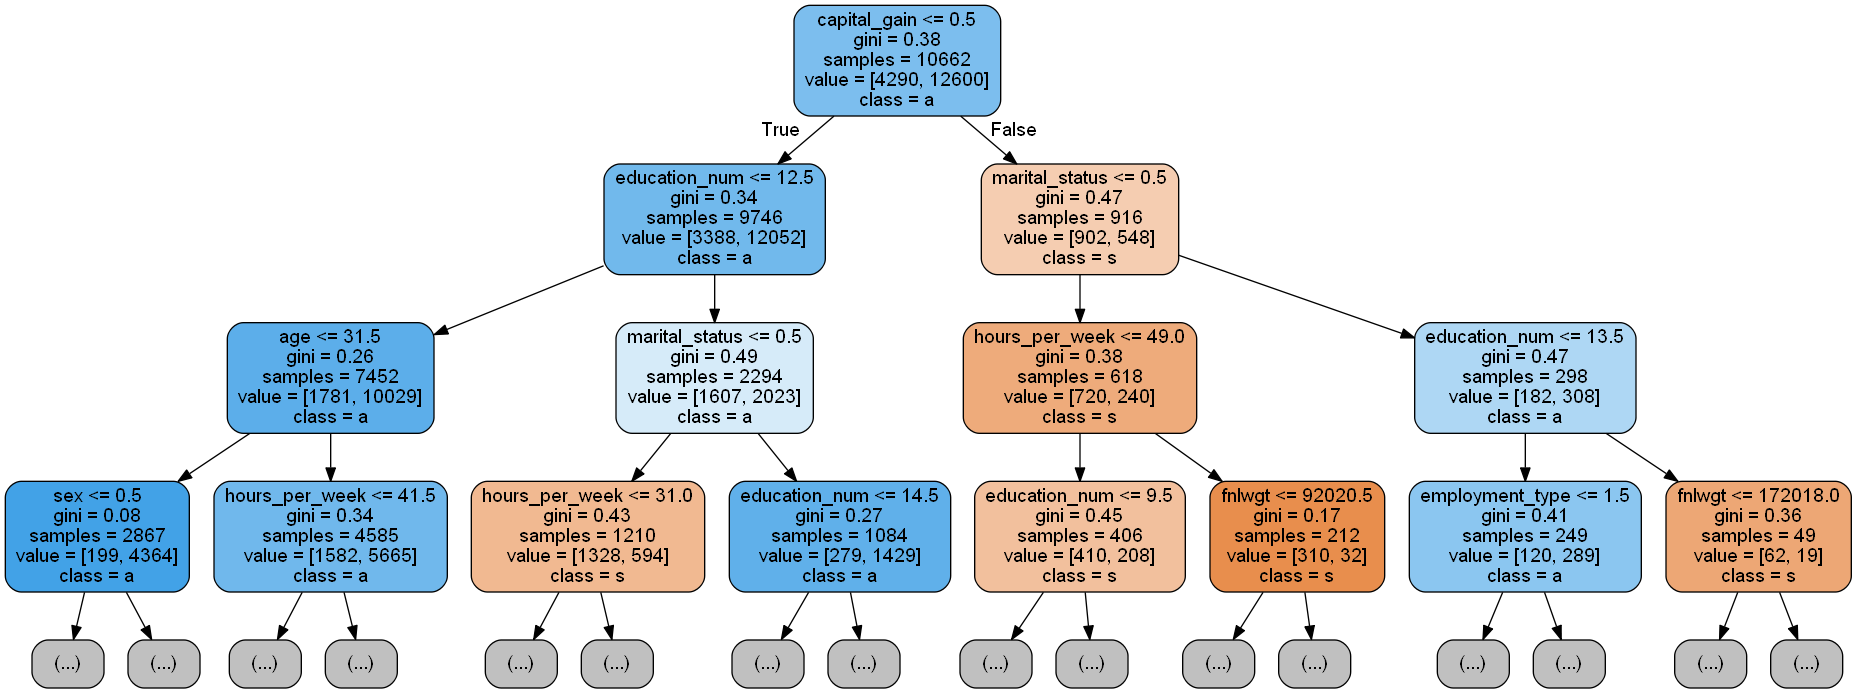

In [60]:
Image(filename='tree.png')

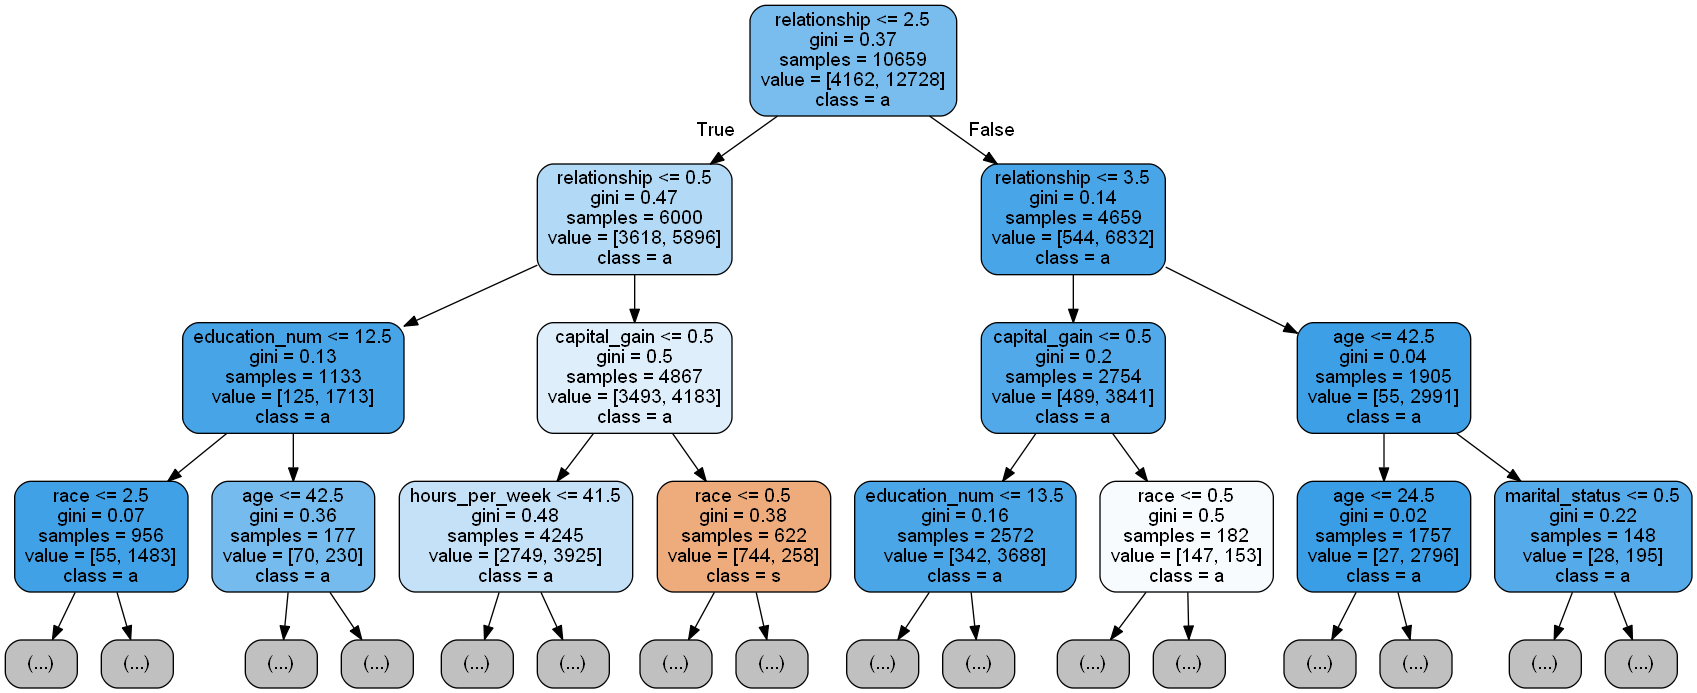

In [61]:
export_graphviz(rfc.estimators_[1],max_depth = 3,out_file='tree.dot',feature_names=X_train.columns,class_names = 'salary',rounded=True,precision=2,filled=True)
!dot -Tpng tree.dot -o tree.png
from IPython.display import Image
Image(filename='tree.png')


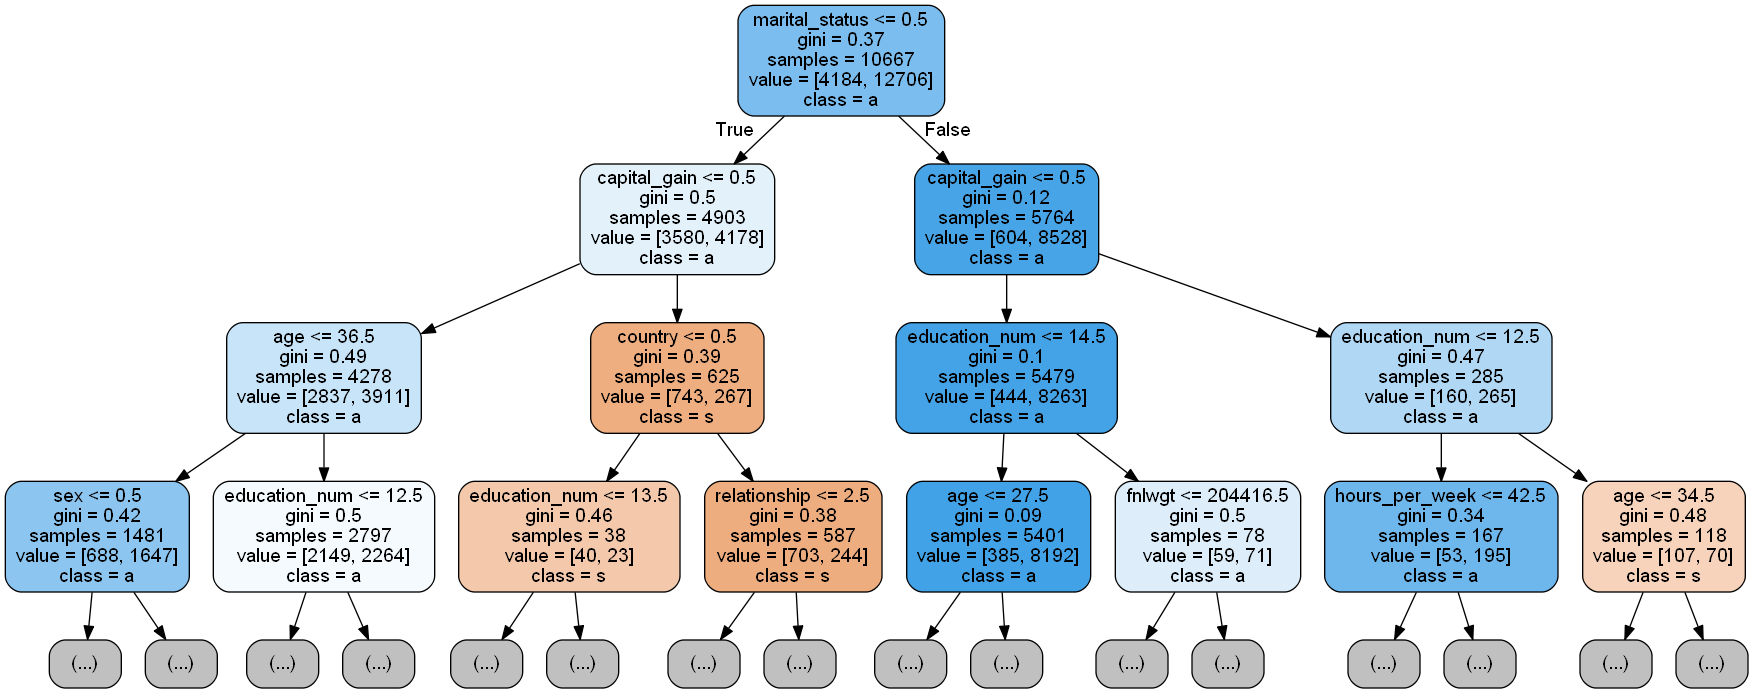

In [62]:
export_graphviz(rfc.estimators_[2],max_depth = 3,out_file='tree.dot',feature_names=X_train.columns,class_names = 'salary',rounded=True,precision=2,filled=True)
# export_graphviz(rfc.estimators_[0],max_depth = 3,out_file='tree.dot',feature_names=X_train.columns,class_names = 'salary',rounded=True,precision=2,filled=True)
!dot -Tpng tree.dot -o tree.png
from IPython.display import Image
Image(filename='tree.png')

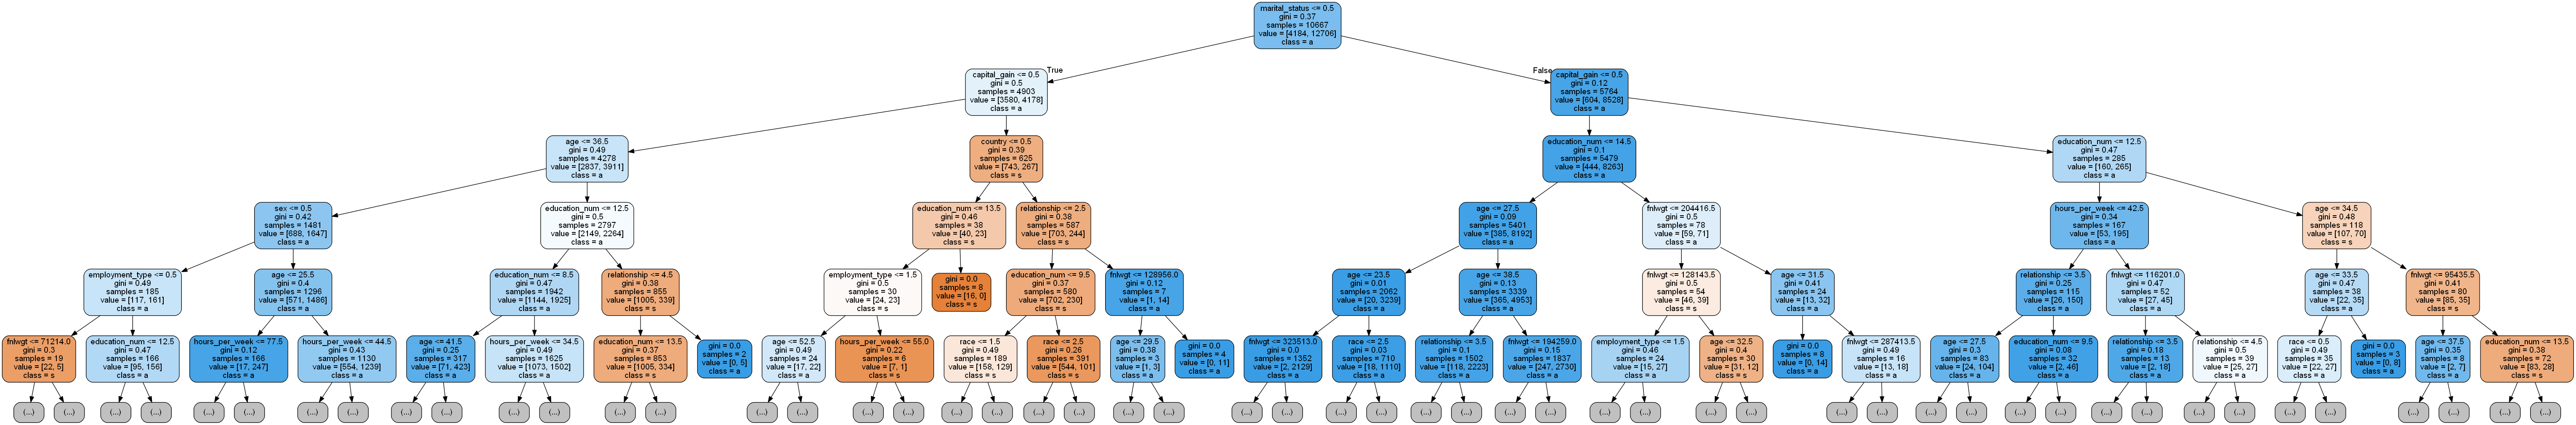

In [68]:
export_graphviz(rfc.estimators_[2],max_depth = 5,out_file='tree.dot',feature_names=X_train.columns,class_names = 'salary',rounded=True,precision=2,filled=True)
# export_graphviz(rfc.estimators_[0],max_depth = 3,out_file='tree.dot',feature_names=X_train.columns,class_names = 'salary',rounded=True,precision=2,filled=True)
!dot -Tpng tree.dot -o tree.png
from IPython.display import Image
Image(filename='tree.png')